Import Libraries


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Loading the Dataset

In [9]:
df = pd.read_csv("email_phishing_data.csv")


Preprocessing the data

In [10]:
df.head()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


In [11]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   num_words            524846 non-null  int64
 1   num_unique_words     524846 non-null  int64
 2   num_stopwords        524846 non-null  int64
 3   num_links            524846 non-null  int64
 4   num_unique_domains   524846 non-null  int64
 5   num_email_addresses  524846 non-null  int64
 6   num_spelling_errors  524846 non-null  int64
 7   num_urgent_keywords  524846 non-null  int64
 8   label                524846 non-null  int64
dtypes: int64(9)
memory usage: 36.0 MB


num_words              0
num_unique_words       0
num_stopwords          0
num_links              0
num_unique_domains     0
num_email_addresses    0
num_spelling_errors    0
num_urgent_keywords    0
label                  0
dtype: int64

In [22]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

num_words: 4278 unique values
num_unique_words: 1892 unique values
num_stopwords: 1885 unique values
num_links: 197 unique values
num_unique_domains: 82 unique values
num_email_addresses: 285 unique values
num_spelling_errors: 1066 unique values
num_urgent_keywords: 8 unique values
label: 2 unique values


Co-relation

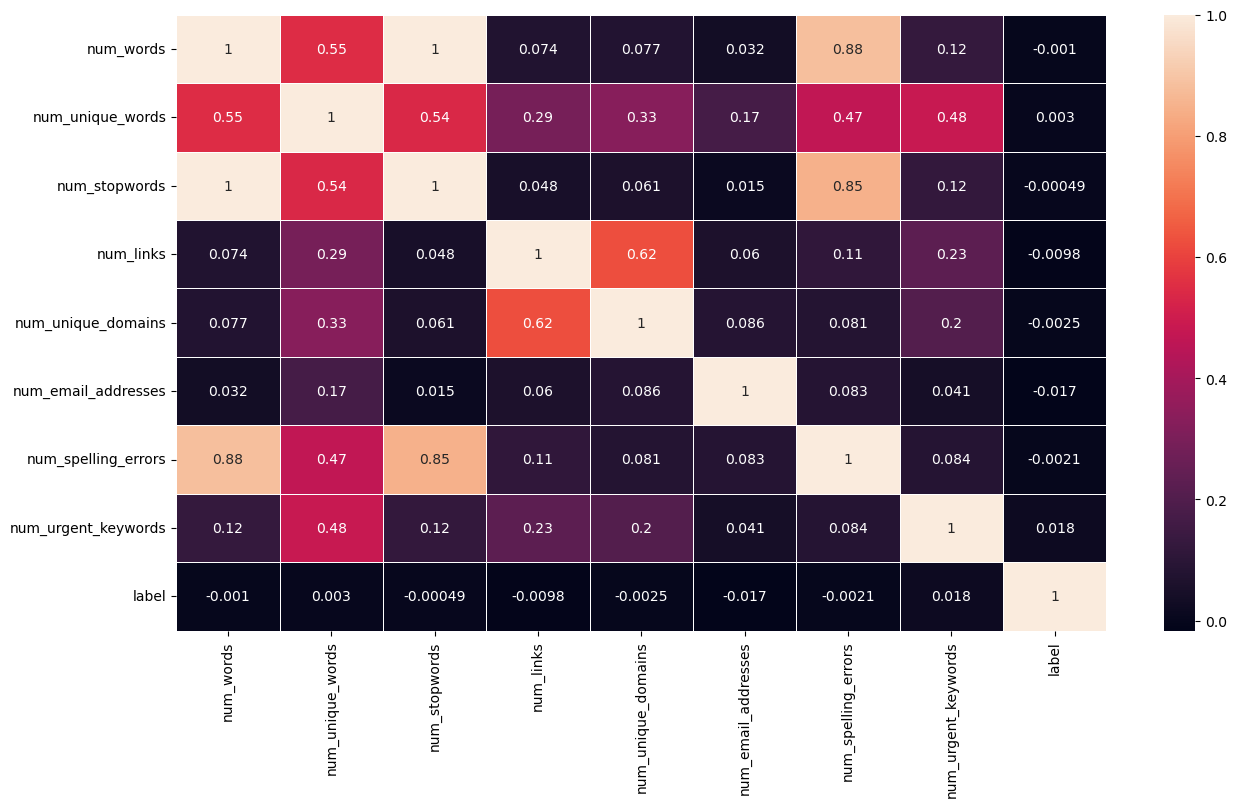

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.5)
plt.show()

In [14]:
target_corr=df.corr()['label'].abs().sort_values(ascending=False)[1:]
target_corr

num_urgent_keywords    0.018400
num_email_addresses    0.016519
num_links              0.009757
num_unique_words       0.003038
num_unique_domains     0.002524
num_spelling_errors    0.002059
num_words              0.001045
num_stopwords          0.000491
Name: label, dtype: float64

In [15]:
df['label'].value_counts()

label
0    517897
1      6949
Name: count, dtype: int64

Training the Model

In [36]:
x = df.drop("label",axis=1)
y = df['label']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [37]:
print(x_train.shape)
print(y_train.shape)

(419876, 8)
(419876,)


In [33]:
print(len(x), len(y))
assert len(x) == len(y), "Mismatch in lengths"


524846 524846


Using three algorithm in loop and finding the most accurate one

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix


In [ ]:
models=[]
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Random Forest:",RandomForestClassifier()))
models.append(("Logistic Regression:",LogisticRegression()))
models.append(("naive bayes",GaussianNB()))



In [ ]:
for name,model in models:
    print(name,model)
    print()
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    print("confusion matrix:",confusion_matrix(y_test,pred))
    print("\n")
    print("accuracy score",accuracy_score(y_test,pred))
    print("\n")